In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize']=[10,10]

## purpose from this tutorial

* 1.define a regression loss function using real data.
    It's easy to using tensorflow to define loss,parameters,and grad respect to loss
* 2.draw the error courtouf
* 3.compare your optimizer and tf implement
* 4.how differnt alg converge

In [2]:
def f(W,fileName='ex1data1.txt'):
        '''
            load a linear regression data,
            then using tensorflow to construct ,loss= mean [(WX-Y)**2] X=[1,x].T Y=[y].T
            
            W is a input,can be any tensor(PlaceHolder,Variable) need Have shape [?,2]
        
            return loss,W
        '''
        df=pd.read_csv(fileName,names=['x','y'])
        df=np.array(df)
        
        
        xs,ys=x,y=df[:,0:1].T,df[:,1:2].T #shape [1,m]
        xs=np.concatenate([np.ones_like(xs),xs],axis=0) #shape [2,m]
        assert(xs.shape[0]==2)
        
        #convert numpy array 2 tensor
        X=tf.constant(value=xs,dtype=tf.float32) #shape (2,m)
        Y=tf.constant(value=ys,dtype=tf.float32) #shape (1,m)

        Yhat=tf.matmul(W,X)
        loss=tf.reduce_mean((Yhat-Y)**2,axis=1)
        

        return loss
def df(loss,W):
    #loss is a scalar
    dW=tf.gradients(loss,W)[0]
    return dW

# get a rough range of the optimal W

In [4]:
tf.reset_default_graph()
sess=tf.Session()
W=tf.get_variable(name='W',shape=[1,2])
loss=f(W,'ex1data1.txt')

opt=tf.train.AdamOptimizer(0.1).minimize(loss)
start=time.time()

sess.run(tf.global_variables_initializer())
for i in range(10000):
    _l,_=sess.run([loss,opt])
optimal_W=sess.run(W)

print(optimal_W)
print('time consume:{:.4}'.format(time.time()-start))
sess.close()

[[-3.89577913  1.19303572]]
time consume:1.298


## The draw the contour graph

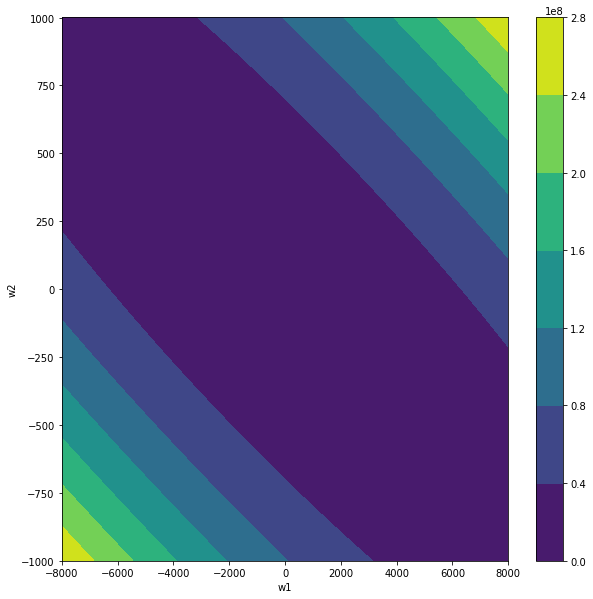

In [5]:
#define the showing range,and prepare for compute loss 
w1,w2=optimal_W[0][0],optimal_W[0][1]
w1_range=np.linspace(w1-8000,w1+8000,2000)
w2_range=np.linspace(w2+1000,w2-1000,1000) #notice reverse order
np_W1,np_W2=np.meshgrid(w1_range,w2_range) #shape[400,300]
np_params=np.stack([np_W1.ravel(),np_W2.ravel()],axis=1) #shape (12000,2)

#lanch tensorflow graph
tf.reset_default_graph()
sess=tf.Session()
W=tf.placeholder(shape=[None,2],dtype=tf.float32)
loss=f(W,'ex1data1.txt')

#get loss
np_loss=sess.run(loss,feed_dict={W:np_params})
np_loss=np.reshape(np_loss,np_W1.shape)

plt.contourf(np_W1,np_W2,np_loss)
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
sess.close()

In [ ]:
def sgd(x0,df,lr=0.01,steps=10):
    trace=[x0]
    x=x0.copy()
    for k in range(steps):
        x=x-lr*df(x)
        trace.append(x)
    return np.array(trace)

def sgd_momentum(x0,df,lr=0.01,steps=10,beta=0.9):
    trace=[x0]
    x=x0.copy()
    v=0
    for k in range(steps):
        v=v*beta+df(x)*(1-beta)
        x=x-lr*v
        trace.append(x)
        
    return np.array(trace)

def rms_prop(x0,df,lr=0.01,steps=10,beta=0.9,eps=1e-9):
    trace=[x0]
    x=x0.copy()
    v=0
    for k in range(steps):
        dx=df(x)
        v=v*beta+(dx**2)*(1-beta)
        x=x-lr*dx/(np.sqrt(v)+eps)
        trace.append(x)
        
    return np.array(trace)

In [ ]:
xrange=np.linspace(-9,9,800)
yrange=np.linspace(-2,2,300)

x,y=np.meshgrid(xrange,yrange)
f=lambda x,y:(x**2)/9+10*y**2
df=lambda x:np.array([2/9*x[0],20*x[1]])
plt.contourf(x,y,f(x,y))

lr,steps=0.01,1000
x0=np.array([-8,1.6])
# for sgd
path=sgd(x0,df,lr=lr,steps=steps)
plt.plot(path[:,0],path[:,1],'r')

#sgd with momentum
# path=sgd_momentum(x0,df,lr=lr,steps=steps)
# plt.plot(path[:,0],path[:,1],'g')


#rmsprop with momentum
# path=rms_prop(x0,df,lr=lr,steps=steps)
# plt.plot(path[:,0],path[:,1],'b')

plt.legend(['sgd','sgd_moment','rmsprop'])

